In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("races.csv")

In [28]:
df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [29]:
df = df[['raceId', 'year', 'circuitId', 'name' ,'date']]
df.head()

,raceId,year,circuitId,name,date
0,1,2009,1,Australian Grand Prix,2009-03-29
1,2,2009,2,Malaysian Grand Prix,2009-04-05
2,3,2009,17,Chinese Grand Prix,2009-04-19
3,4,2009,3,Bahrain Grand Prix,2009-04-26
4,5,2009,4,Spanish Grand Prix,2009-05-10


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1101 non-null   int64 
 1   year       1101 non-null   int64 
 2   circuitId  1101 non-null   int64 
 3   name       1101 non-null   object
 4   date       1101 non-null   object
dtypes: int64(3), object(2)
memory usage: 43.1+ KB


In [31]:
df["year"].value_counts()

2023    22
2021    22
2022    22
2016    21
2019    21
        ..
1957     8
1961     8
1951     8
1950     7
1955     7
Name: year, Length: 74, dtype: int64

In [32]:
df["name"].value_counts()

Italian Grand Prix               74
British Grand Prix               74
Monaco Grand Prix                69
Belgian Grand Prix               68
German Grand Prix                64
French Grand Prix                62
Spanish Grand Prix               53
Canadian Grand Prix              52
Brazilian Grand Prix             48
United States Grand Prix         44
Hungarian Grand Prix             38
Japanese Grand Prix              37
Australian Grand Prix            37
Austrian Grand Prix              36
Dutch Grand Prix                 33
San Marino Grand Prix            26
European Grand Prix              23
South African Grand Prix         23
Argentine Grand Prix             20
Mexican Grand Prix               20
Bahrain Grand Prix               19
Malaysian Grand Prix             19
Portuguese Grand Prix            18
Chinese Grand Prix               16
Abu Dhabi Grand Prix             15
Singapore Grand Prix             14
Indianapolis 500                 11
Turkish Grand Prix          

In [33]:
#Finding the winners of the races
df_winners = pd.read_csv("results.csv")

In [34]:
df_winners = df_winners[df_winners["positionOrder"] == 1]
df_winners = df_winners[["raceId", "driverId", "constructorId", "laps", "time", "statusId"]]
df_winners.head()

,raceId,driverId,constructorId,laps,time,statusId
0,18,1,1,58,1:34:50.616,1
22,19,8,6,56,1:31:18.555,1
44,20,13,6,57,1:31:06.970,1
66,21,8,6,66,1:38:19.051,1
88,22,13,6,58,1:26:49.451,1


In [35]:
df_winners.shape

(1093, 6)

In [36]:
df = df.merge(df_winners, on="raceId", how="right")
df.head()

,raceId,year,circuitId,name,date,driverId,constructorId,laps,time,statusId
0,18,2008,1,Australian Grand Prix,2008-03-16,1,1,58,1:34:50.616,1
1,19,2008,2,Malaysian Grand Prix,2008-03-23,8,6,56,1:31:18.555,1
2,20,2008,3,Bahrain Grand Prix,2008-04-06,13,6,57,1:31:06.970,1
3,21,2008,4,Spanish Grand Prix,2008-04-27,8,6,66,1:38:19.051,1
4,22,2008,5,Turkish Grand Prix,2008-05-11,13,6,58,1:26:49.451,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   raceId         1093 non-null   int64 
 1   year           1093 non-null   int64 
 2   circuitId      1093 non-null   int64 
 3   name           1093 non-null   object
 4   date           1093 non-null   object
 5   driverId       1093 non-null   int64 
 6   constructorId  1093 non-null   int64 
 7   laps           1093 non-null   int64 
 8   time           1093 non-null   object
 9   statusId       1093 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 93.9+ KB


In [38]:
df.isna().sum()

raceId           0
year             0
circuitId        0
name             0
date             0
driverId         0
constructorId    0
laps             0
time             0
statusId         0
dtype: int64

In [39]:
df_driver = pd.read_csv("drivers.csv")
df_driver = df_driver[["driverId", "driverRef"]]
dict_driver = df_driver.set_index('driverId').to_dict()
dict_driver = dict_driver["driverRef"]


In [40]:
df["driver_name"] = df["driverId"].apply(lambda x: dict_driver[x])

In [41]:
df.head()

,raceId,year,circuitId,name,date,driverId,constructorId,laps,time,statusId,driver_name
0,18,2008,1,Australian Grand Prix,2008-03-16,1,1,58,1:34:50.616,1,hamilton
1,19,2008,2,Malaysian Grand Prix,2008-03-23,8,6,56,1:31:18.555,1,raikkonen
2,20,2008,3,Bahrain Grand Prix,2008-04-06,13,6,57,1:31:06.970,1,massa
3,21,2008,4,Spanish Grand Prix,2008-04-27,8,6,66,1:38:19.051,1,raikkonen
4,22,2008,5,Turkish Grand Prix,2008-05-11,13,6,58,1:26:49.451,1,massa


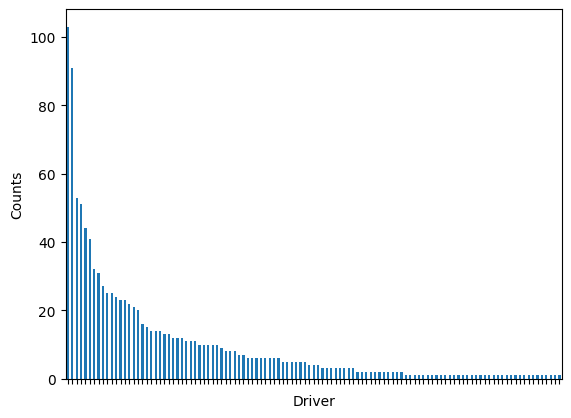

In [42]:
import matplotlib.pyplot as plt
bar = df["driver_name"].value_counts().plot.bar()
ax = bar.axes
ax.set_xticklabels([])


plt.xlabel("Driver")
plt.ylabel("Counts")
plt.show()

In [43]:

import fastf1 as ff1

#According to the documentation, fastf1 only contains weather data from 2018 and onwards


df_2 = df[df["year"] >= 2018].reset_index(drop=True)
df_2[["Temperature (C)", "Humidity", "WindSpeed", "TrackTemp", "Rain"]] = ''
for i in range(df_2.shape[0]):
    weekend = ff1.get_session(df_2["year"][i], df_2["name"][i], "R")
    weekend.load(telemetry=False, weather=True)
    weather_df = weekend.weather_data
    df_2["Temperature (C)"].loc[i] = weather_df["AirTemp"].mean()
    df_2["Humidity"].loc[i] = weather_df["Humidity"].mean()
    df_2["WindSpeed"].loc[i] = weather_df["WindSpeed"].mean()
    df_2["TrackTemp"].loc[i] = weather_df["TrackTemp"].mean()
    if weather_df["Rainfall"].any() == True:
        df_2["Rain"].loc[i] = True
    else:
        df_2["Rain"].loc[i] = False


core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.2]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55', '11', '31', '16', '18', '28', '8', '20', '10', '9', '35']
/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_21701/686066829.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [44]:
df_2.head().isna().sum()

raceId             0
year               0
circuitId          0
name               0
date               0
driverId           0
constructorId      0
laps               0
time               0
statusId           0
driver_name        0
Temperature (C)    0
Humidity           0
WindSpeed          0
TrackTemp          0
Rain               0
dtype: int64

In [45]:
df_2.to_csv('f1_2018.csv')